 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = "Resources/whale_returns.csv"
whale_df = pd.read_csv(whale_path)
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = "Resources/algo_returns.csv"
algo_df = pd.read_csv(algo_path)
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.drop(columns=['Date'], inplace=True)
algo_df.sort_index()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = "Resources/sp500_history.csv"
sp500_df = pd.read_csv(sp500_path)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.sort_index()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={'Close' : 'S&P 500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_compare_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
portfolio_compare_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

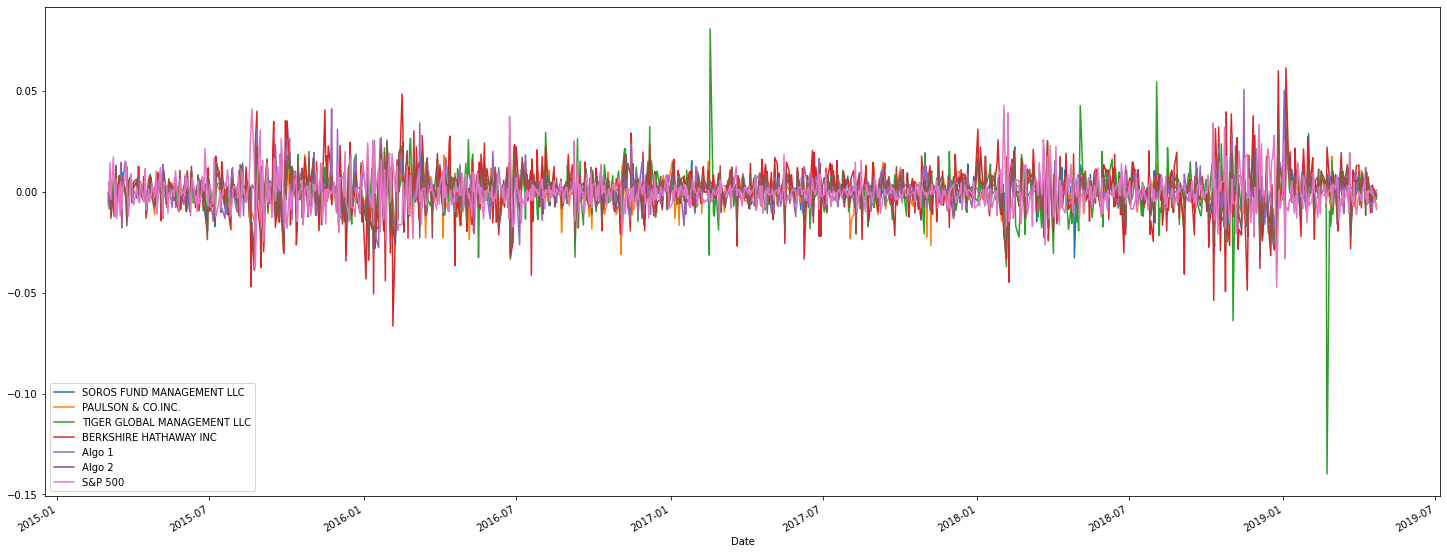

In [15]:
# Plot daily returns of all portfolios
portfolio_compare_df.plot(figsize= (25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

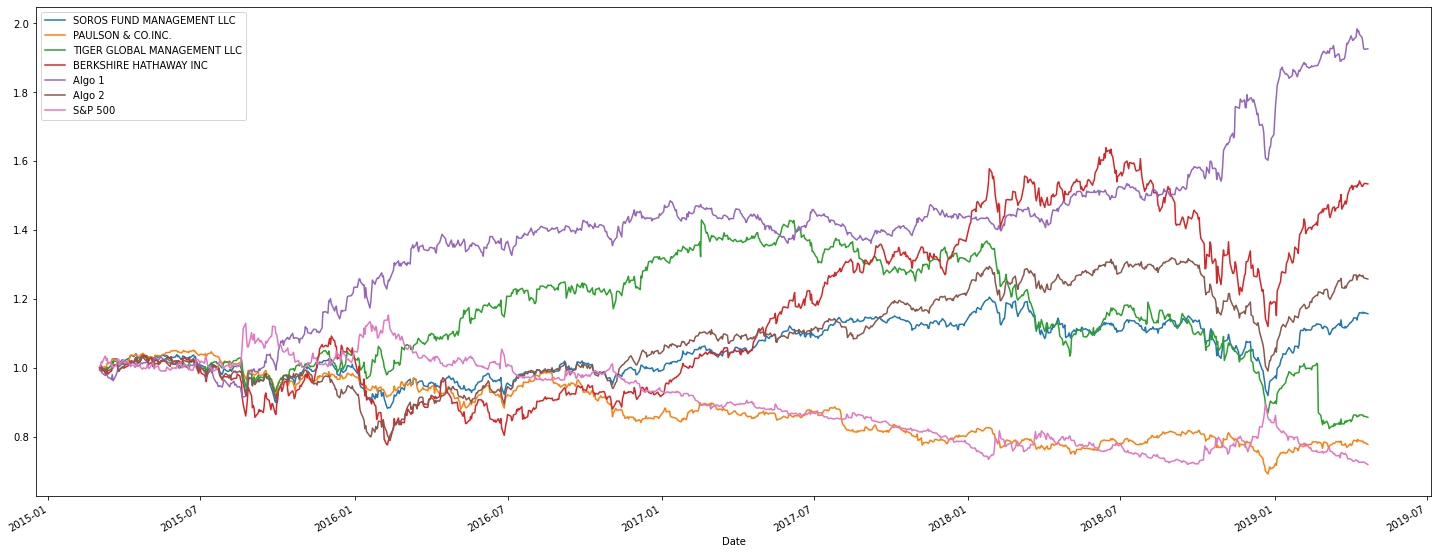

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_compare_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Box Plot'}>

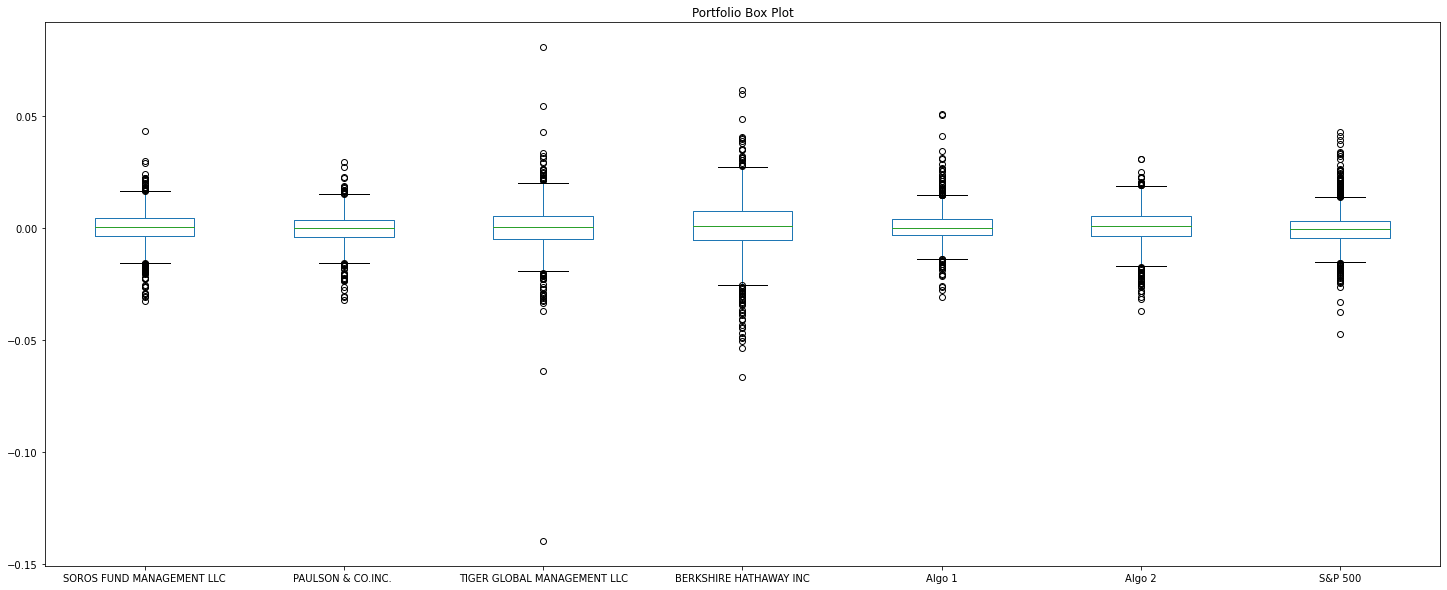

In [17]:
# Box plot to visually show risk
#portfolio_std.plot.box()
portfolio_compare_df.plot.box(figsize= (25,10), title='Portfolio Box Plot')

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = portfolio_compare_df.std()

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
snp500_std = portfolio_compare_df['S&P 500'].std()

# Determine which portfolios are riskier than the S&P 500
port_name_counter = 0 

for portfolio_risk in daily_std:
    if portfolio_risk > snp500_std:
        print(f'{daily_std.index[port_name_counter]} this portfolio IS riskier than the S&P 500')
    else:
        print(f'{daily_std.index[port_name_counter]} this portfolio IS NOT riskier than the S&P 500')
    port_name_counter += 1

SOROS FUND MANAGEMENT LLC this portfolio IS NOT riskier than the S&P 500
PAULSON & CO.INC.  this portfolio IS NOT riskier than the S&P 500
TIGER GLOBAL MANAGEMENT LLC this portfolio IS riskier than the S&P 500
BERKSHIRE HATHAWAY INC this portfolio IS riskier than the S&P 500
Algo 1 this portfolio IS NOT riskier than the S&P 500
Algo 2 this portfolio IS NOT riskier than the S&P 500
S&P 500 this portfolio IS NOT riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
std_annual = portfolio_compare_df.std() * np.sqrt(252)
std_annual

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

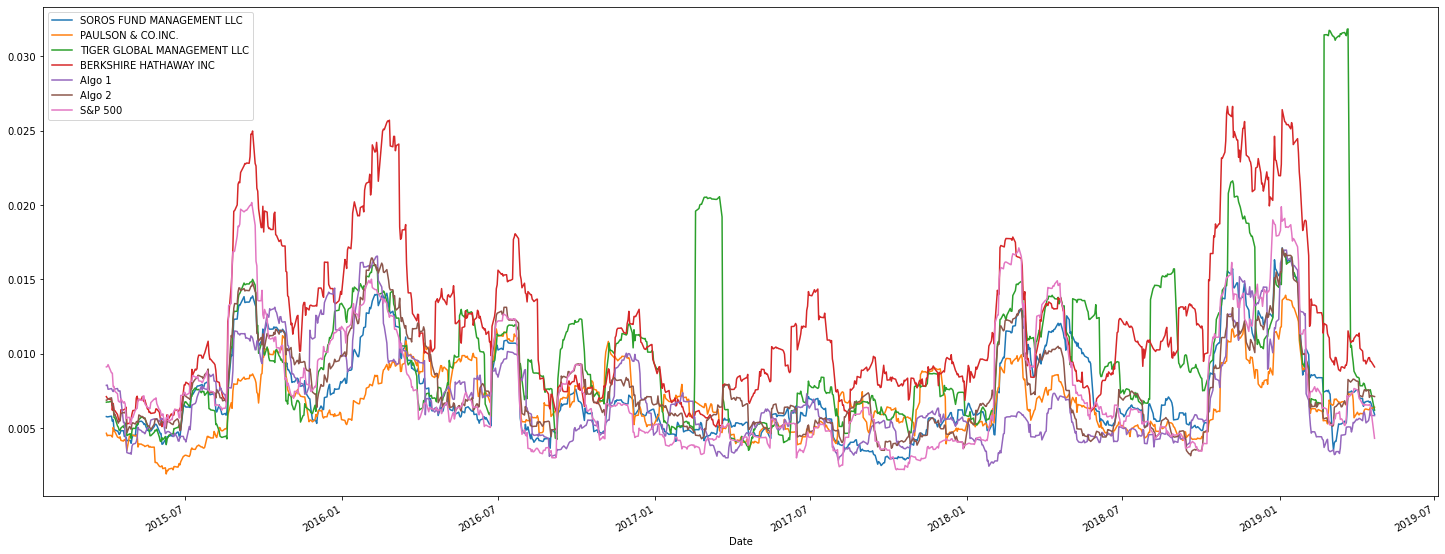

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_compare_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(25,10))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = portfolio_compare_df.corr()

# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

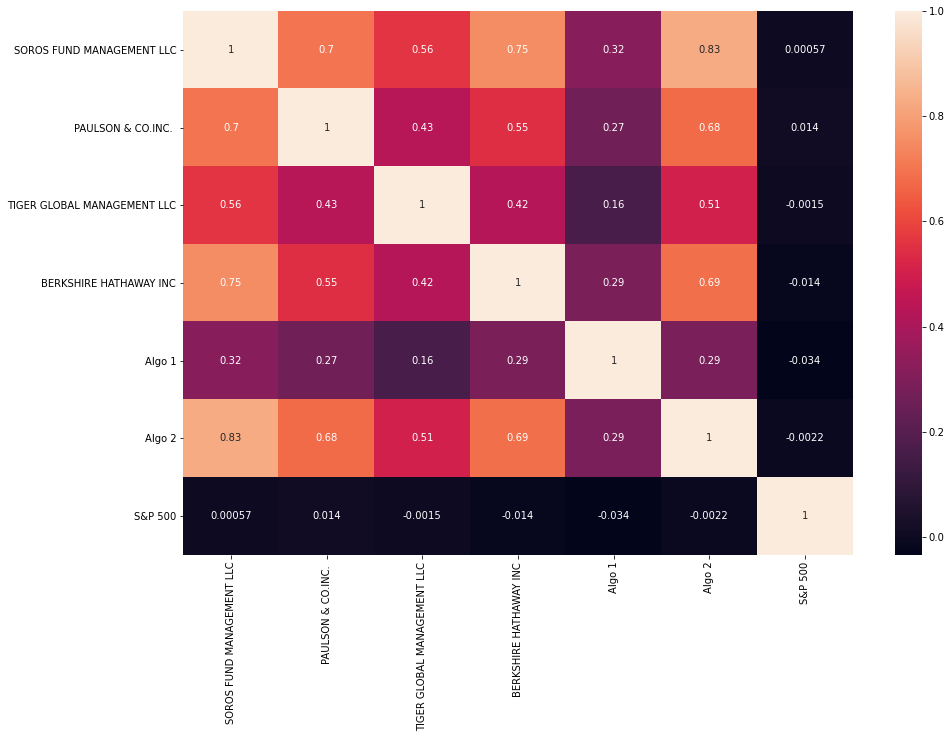

In [24]:
#Just wanted to make it pretty and check output
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Berkshire Portfolio'}, xlabel='Date'>

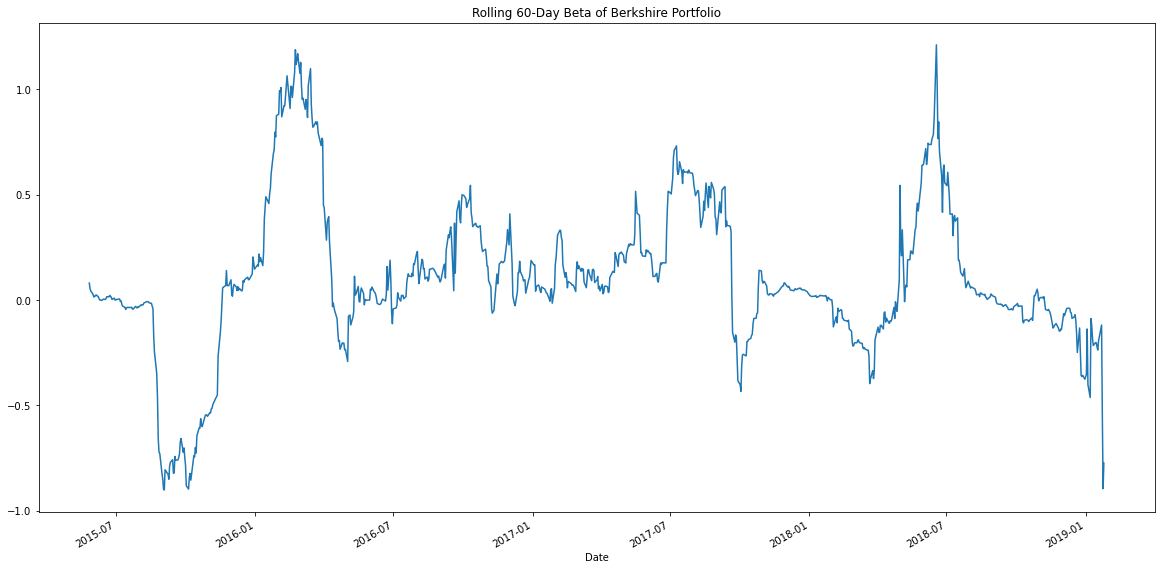

In [25]:
# Calculate covariance of a single portfolio
covariance = portfolio_compare_df['BERKSHIRE HATHAWAY INC'].cov(sp500_daily_returns['S&P 500'])

# Calculate variance of S&P 500
variance = sp500_daily_returns['S&P 500'].var()

# Computing beta
berkshire_beta = covariance / variance

# Plot beta trend - calculate and plot the 60-day rolling beta between it and the S&P 500.
rolling_covariance = portfolio_compare_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(sp500_daily_returns['S&P 500'])
rolling_variance = sp500_daily_returns['S&P 500'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Portfolio')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [26]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_compare_df.mean() * 252) / (portfolio_compare_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Return-to-Risk of Portfolio Comparison'}>

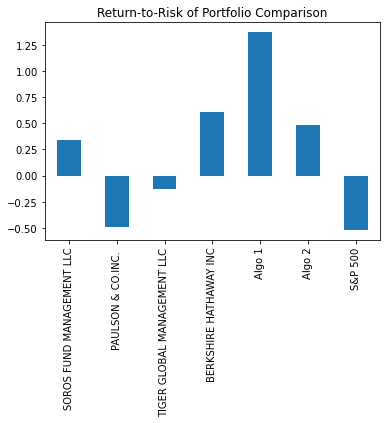

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Return-to-Risk of Portfolio Comparison')


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The two algrithmic stratagies, Algo 1 and Algo 2, both outperformed the market and whale portolfios and offered the best return-to-risk.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [29]:
# Reading data from 1st stock
zillow_path = "Resources/z_historical.csv"
zillow_df = pd.read_csv(zillow_path)
zillow_df.set_index(pd.to_datetime(zillow_df['Date'], infer_datetime_format=True).dt.date, inplace=True)
zillow_df.drop(columns=['Date'], inplace=True)
zillow_df.sort_index()
zillow_df

,Close
Date,
2018-06-01,59.03
2018-06-04,59.33
2018-06-05,60.83
2018-06-06,62.21
2018-06-07,61.52
...,...
2020-12-08,114.70
2020-12-09,117.23
2020-12-10,121.09


In [30]:
# Reading data from 2nd stock
square_path = "Resources/sq_historical.csv"
square_df = pd.read_csv(square_path)
square_df.set_index(pd.to_datetime(square_df['Date'], infer_datetime_format=True).dt.date, inplace=True)
square_df.drop(columns=['Date'], inplace=True)
square_df.sort_index()
square_df

,Close
Date,
2018-06-01,59.41
2018-06-04,61.20
2018-06-05,61.57
2018-06-06,62.72
2018-06-07,60.67
...,...
2020-12-10,217.25
2020-12-11,216.59
2020-12-14,215.86


In [31]:
# Reading data from 3rd stock
vanguard_path = "Resources/vanguard_FTSE.csv"
vanguard_df = pd.read_csv(vanguard_path)
vanguard_df.set_index(pd.to_datetime(vanguard_df['Date'], infer_datetime_format=True).dt.date, inplace=True)
vanguard_df.drop(columns=['Date'], inplace=True)
vanguard_df.sort_index()
vanguard_df

,Close
Date,
2018-06-01,44.50
2018-06-04,44.70
2018-06-05,44.65
2018-06-06,45.03
2018-06-07,44.77
...,...
2020-12-07,46.40
2020-12-08,46.51
2020-12-09,46.57


In [32]:
# Combine all stocks in a single DataFrame
myportfolio = pd.concat([zillow_df, square_df, vanguard_df], axis='columns', join='inner')
columns = ['Zillow', 'Square', 'Vanguard VEA']
myportfolio.columns = columns
myportfolio

,Zillow,Square,Vanguard VEA
Date,,,
2018-06-01,59.03,59.41,44.50
2018-06-04,59.33,61.20,44.70
2018-06-05,60.83,61.57,44.65
2018-06-06,62.21,62.72,45.03
2018-06-07,61.52,60.67,44.77
...,...,...,...
2020-12-07,111.92,212.58,46.40
2020-12-08,114.70,213.01,46.51
2020-12-09,117.23,207.04,46.57


In [33]:
# Reset Date index
myportfolio = myportfolio.reset_index()


In [34]:
# Reorganize portfolio data by having a column per symbol
myportfolio.set_index(pd.to_datetime(myportfolio['Date'], infer_datetime_format=True), inplace=True)
myportfolio.drop(columns=['Date'], inplace=True)

In [35]:
# Calculate daily returns
my_returns = myportfolio.pct_change()

# Drop NAs
my_returns.dropna(inplace=True)

# Display sample data
my_returns.head(10)

,Zillow,Square,Vanguard VEA
Date,,,
2018-06-04,0.005082,0.030130,0.004494
2018-06-05,0.025282,0.006046,-0.001119
2018-06-06,0.022686,0.018678,0.008511
2018-06-07,-0.011091,-0.032685,-0.005774
2018-06-08,0.014792,0.018296,0.001787
2018-06-11,0.003524,-0.007931,0.006466
2018-06-12,0.026975,0.031326,-0.006203
2018-06-13,-0.005440,-0.011232,0.000446
2018-06-14,0.017190,0.022080,-0.002451


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = my_returns.dot(weights)

# Display sample data
weighted_returns.head(10)

Date
2018-06-04    0.013235
2018-06-05    0.010070
2018-06-06    0.016625
2018-06-07   -0.016517
2018-06-08    0.011625
2018-06-11    0.000686
2018-06-12    0.017366
2018-06-13   -0.005409
2018-06-14    0.012273
2018-06-15    0.003281
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
compareall_df = pd.concat([portfolio_compare_df, my_returns], axis='columns', join='outer')
compareall_df#.to_csv(r'File Name.csv')



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Zillow,Square,Vanguard VEA
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046275,0.021283,-0.007274
2020-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024839,0.002023,0.002371
2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022058,-0.028027,0.001290


In [38]:
compareall_df.shape

(1458, 10)

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
compareall_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
std_annual = compareall_df.std() * np.sqrt(252)
std_annual

SOROS FUND MANAGEMENT LLC      0.150055
PAULSON & CO.INC.              0.119801
TIGER GLOBAL MANAGEMENT LLC    0.237394
BERKSHIRE HATHAWAY INC         0.253153
Algo 1                         0.137048
Algo 2                         0.142434
S&P 500                        0.154921
Zillow                         0.614912
Square                         0.579573
Vanguard VEA                   0.135173
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

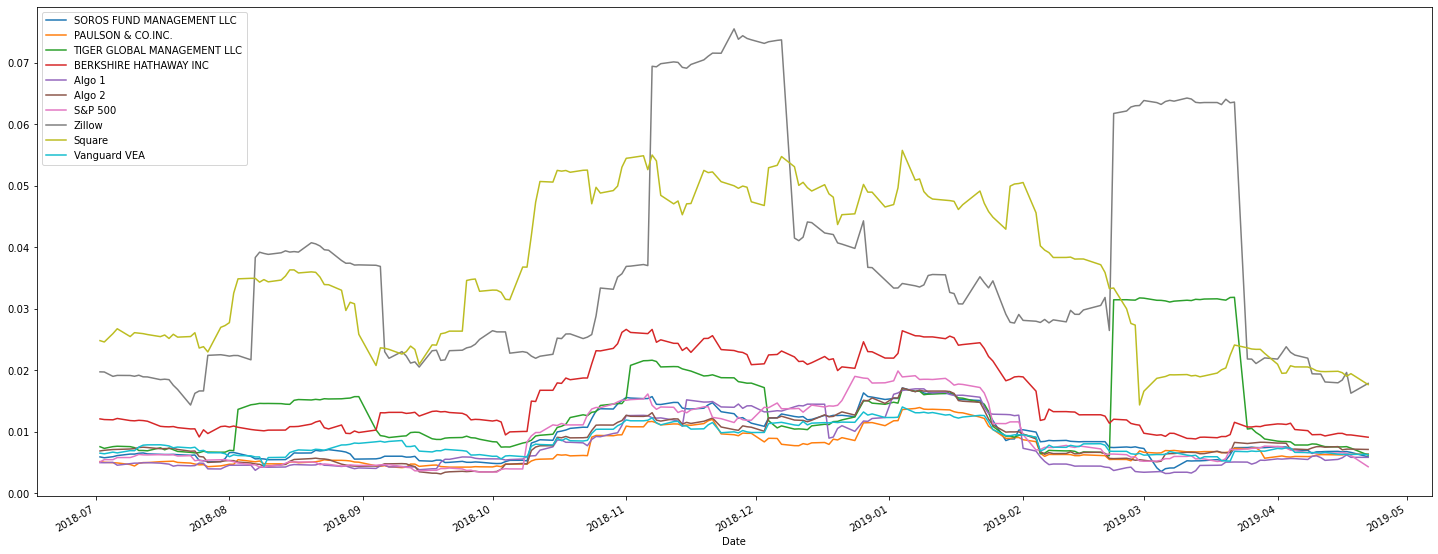

In [41]:
# Calculate rolling standard deviation
rolling_std = compareall_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(25,10))

### Calculate and plot the correlation

In [42]:
# Calculate and plot the correlation
correlation = compareall_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Zillow,Square,Vanguard VEA
SOROS FUND MANAGEMENT LLC,1.000000,0.790604,0.472448,0.821532,0.347505,0.866179,-0.043598,0.358786,0.643269,0.764492
PAULSON & CO.INC.,0.790604,1.000000,0.480578,0.654687,0.369981,0.786128,-0.072933,0.278815,0.534261,0.698336
TIGER GLOBAL MANAGEMENT LLC,0.472448,0.480578,1.000000,0.322097,0.119839,0.402711,-0.013110,-0.111381,0.221403,0.401573
BERKSHIRE HATHAWAY INC,0.821532,0.654687,0.322097,1.000000,0.334318,0.785656,-0.045834,0.369904,0.751273,0.774062
Algo 1,0.347505,0.369981,0.119839,0.334318,1.000000,0.382106,-0.049933,0.153639,0.249222,0.283537
Algo 2,0.866179,0.786128,0.402711,0.785656,0.382106,1.000000,-0.055970,0.329280,0.665296,0.776622
S&P 500,-0.043598,-0.072933,-0.013110,-0.045834,-0.049933,-0.055970,1.000000,-0.058590,0.016594,-0.034295
Zillow,0.358786,0.278815,-0.111381,0.369904,0.153639,0.329280,-0.058590,1.000000,0.298234,0.234964
Square,0.643269,0.534261,0.221403,0.751273,0.249222,0.665296,0.016594,0.298234,1.000000,0.550929
Vanguard VEA,0.764492,0.698336,0.401573,0.774062,0.283537,0.776622,-0.034295,0.234964,0.550929,1.000000


<AxesSubplot:>

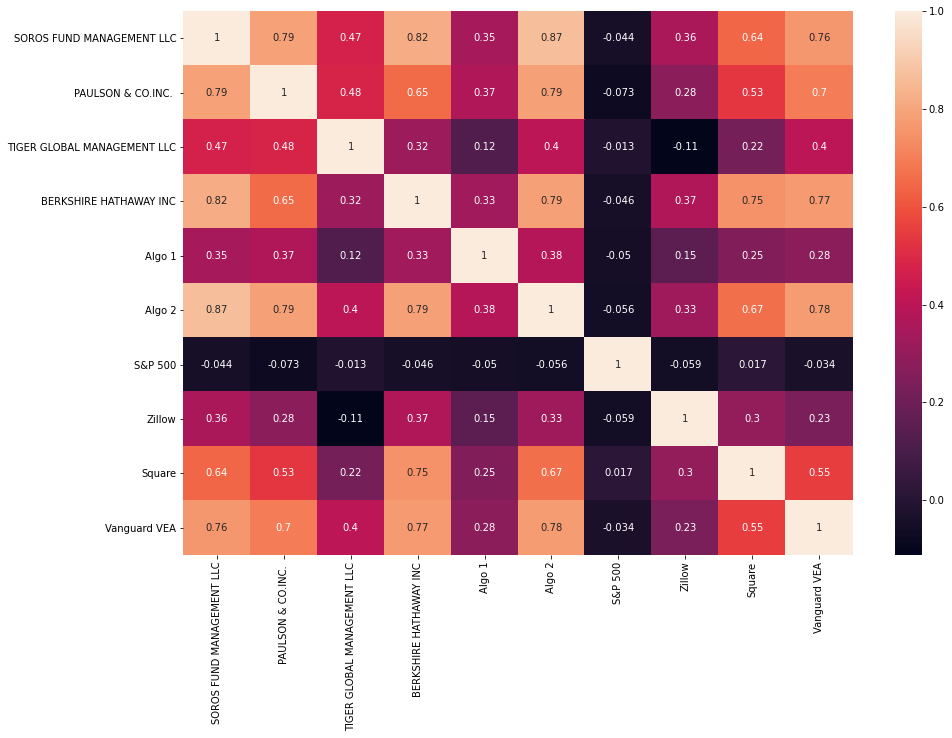

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

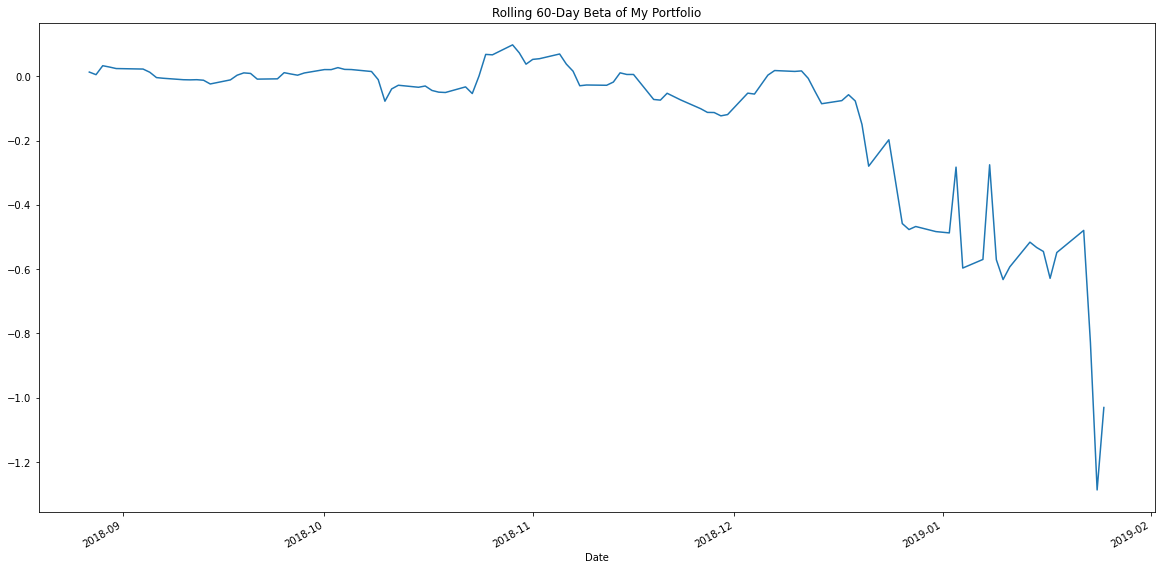

In [44]:
# Calculate and plot Beta
covariance = weighted_returns.cov(sp500_daily_returns['S&P 500'])

# Calculate variance of S&P 500
variance = sp500_daily_returns['S&P 500'].var()

# Computing beta
my_beta = covariance / variance

# Plot beta trend - calculate and plot the 60-day rolling beta between it and the S&P 500.
rolling_covariance = weighted_returns.rolling(window=60).cov(sp500_daily_returns['S&P 500'])
rolling_variance = sp500_daily_returns['S&P 500'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (my_returns.mean() * 252) / (my_returns.std() * np.sqrt(252))
sharpe_ratios

Zillow          0.793314
Square          1.154629
Vanguard VEA    0.191108
dtype: float64

<AxesSubplot:title={'center':'Return-to-Risk of My Portfolio'}>

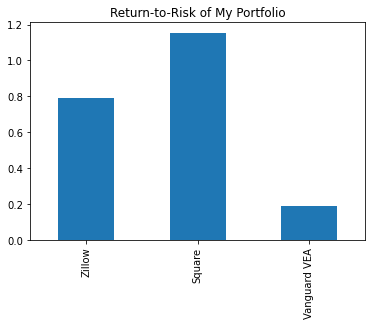

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Return-to-Risk of My Portfolio')

### How does your portfolio do?

Write your answer here!

I think my portfolio does well and has stocks with sharpe ratios that rival the Whales above.   Zillow and Square are tech oriented stocks that have performed strongly the last 2-3 years and consistently beaten S&P 500 returns.  Vanguard VEA Developed Markets Index Fund that tracks successful companies in developed foreign markets.

All 3 are positive on the sharpe ratio chart indicating better risk-adjusted-performance compared to S&P 500.  